# Team Members
- Omer Elghareeb
- Sherif Samy
- Hadeer Ismail
- Shereen
- Noor Samy
- Aya Elsawy

In [8]:
from google.colab import drive
dataset_file = '/content/drive/MyDrive/Colab Notebooks/Cellula-ML-Projects/Datasets/Taxi-Fare-Amounts.csv'
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Filter out all warnings
warnings.filterwarnings("ignore")

## Data Understanding

## Objective

The aim of this dataset called New York taxi fare based on the airports mentioned in the data dataset is to provide a comprehensive collection of data on taxi rides within New York City. This dataset is valuable for analyzing and understanding various factors influencing taxi fare amounts, enabling researchers and analysts to develop models that accurately predict fare costs based on relevant input features.



## Data Explaining

The dataset contains several columns with information about taxi service.The detailed data is given below:

* <code>'User ID'</code>: A unique identifier for each user.
* <code>'User Name'</code>: The name of the user.
* <code>'Driver Name'</code>: The name of the taxi driver.
* <code>'Car Condition'</code>: The condition of the taxi car.
* <code>'Weather'</code>: Information about the weather conditions during the trip.
* <code>'Traffic Condition'</code>: Information about the traffic conditions during the trip.
* <code>'key'</code>: A unique identifier for each trip.
* <code>'fare_amount'</code>: The fare amount charged for the trip.
* <code>'pickup_datetime'</code>: The date and time when the trip started.
* <code>'pickup_longitude'</code>: The longitude coordinate of the pickup location.
* <code>'pickup_latitude'</code>: The latitude coordinate of the pickup location.
* <code>'dropoff_longitude'</code>: The longitude coordinate of the dropoff location.
* <code>'dropoff_latitude'</code>: The latitude coordinate of the dropoff location.
* <code>'passenger_count'</code>: The number of passengers in the taxi.
* <code>'hour'</code>: The hour of the day when the trip started.
* <code>'day'</code>: The day of the month when the trip started.
* <code>'month'</code>: The month when the trip started.
* <code>'weekday'</code>: The day of the week when the trip started.
* <code>'year'</code>: The year when the trip started.
* <code>'jfk_dist'</code>: The distance from the pickup location to John F. Kennedy International Airport.
* <code>'ewr_dist'</code>: The distance from the pickup location to Newark Liberty International Airport.
* <code>'lga_dist'</code>: The distance from the pickup location to LaGuardia Airport.
* <code>'sol_dist'</code>: The distance from the pickup location to Statue of Liberty.
* <code>'nyc_dist'</code>: The distance from the pickup location to the center of New York City.
* <code>'distance'</code>: The total distance of the trip.
* <code>'bearing'</code>: The direction of travel from the pickup point to the dropoff point.

for more information about bearing and distance in this notebook, you can go to https://www.movable-type.co.uk/scripts/latlong.html


In [9]:
df=pd.read_csv(dataset_file)
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

***Check the dubclicates***


In [ ]:
df.duplicated().sum()

0

***Missing Values***

In [ ]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

***Select the Object & primitive Dtypes***

In [ ]:
object_cols=df.select_dtypes(include=['object']).columns.to_list()
primative_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()
print('object_cols len = ', len(object_cols),'\nprimative_cols len = ', len(primative_cols))


object_cols len =  8 
primative_cols len =  18


***Plot some features to check its distibution***

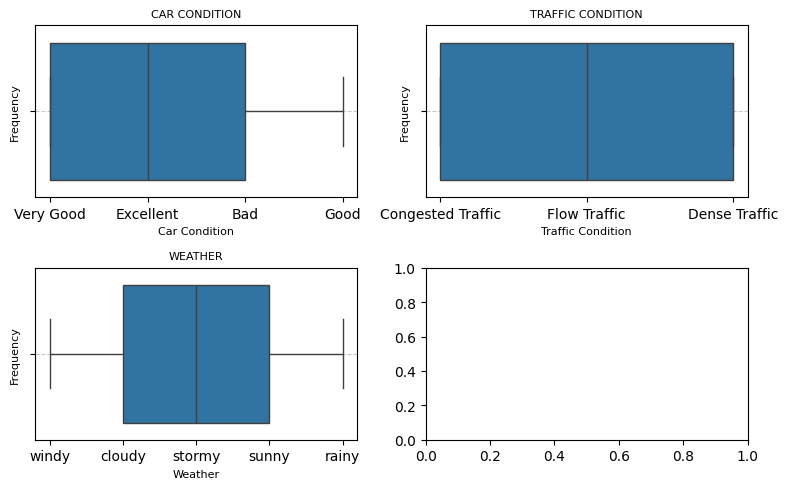

In [ ]:
caltegorical_features=['Car Condition','Traffic Condition','Weather']
fig, ax = plt.subplots(2,2,figsize=(8,5))

for i, col in enumerate(caltegorical_features):
    sns.boxplot(x=col, data=df, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{col.upper()}', fontsize=8)
    ax.flatten()[i].set_xlabel(col, fontsize=8)
    ax.flatten()[i].set_ylabel('Frequency', fontsize=8)
    ax.flatten()[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

***Fare_amount distribution & totaldistance***

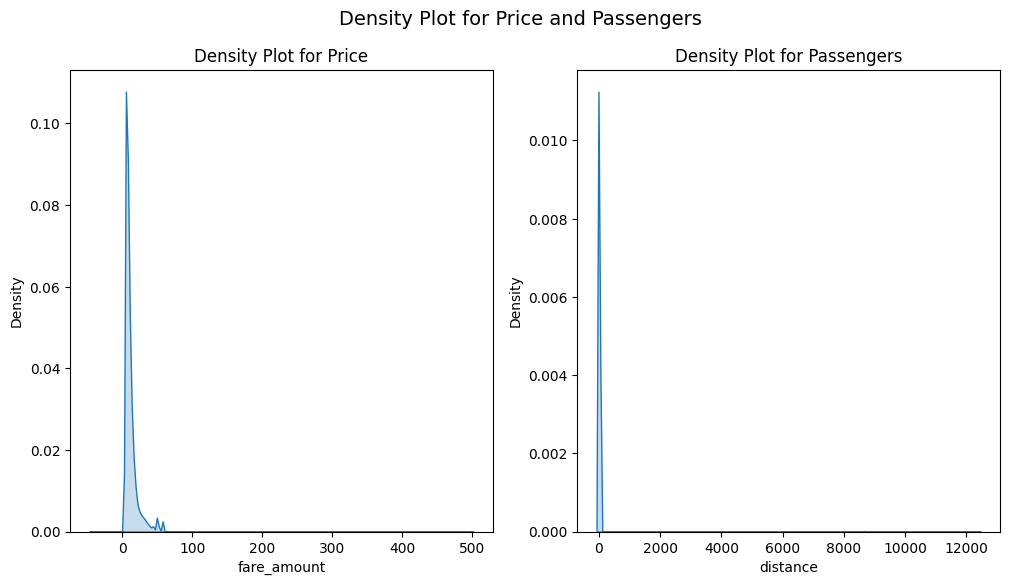

In [ ]:
# Create a figure dimensions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Density Plot for 'average price'
sns.kdeplot(data=df['fare_amount'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot for Price')
# Density Plot for 'lead time'
sns.kdeplot(data=df['distance'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot for Passengers')
# Subplots Title
plt.suptitle('Density Plot for Price and Passengers', fontsize=14)
plt.show()

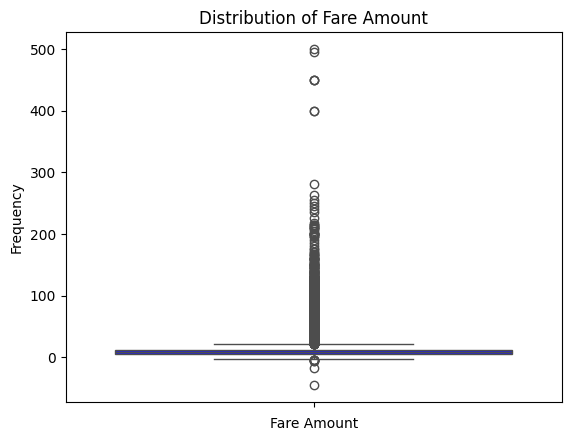

In [ ]:
#plot the fare amount using boxplot
sns.boxplot(df['fare_amount'],color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Skewniess to the right ? try to take log tansformation


***Passenger counts***

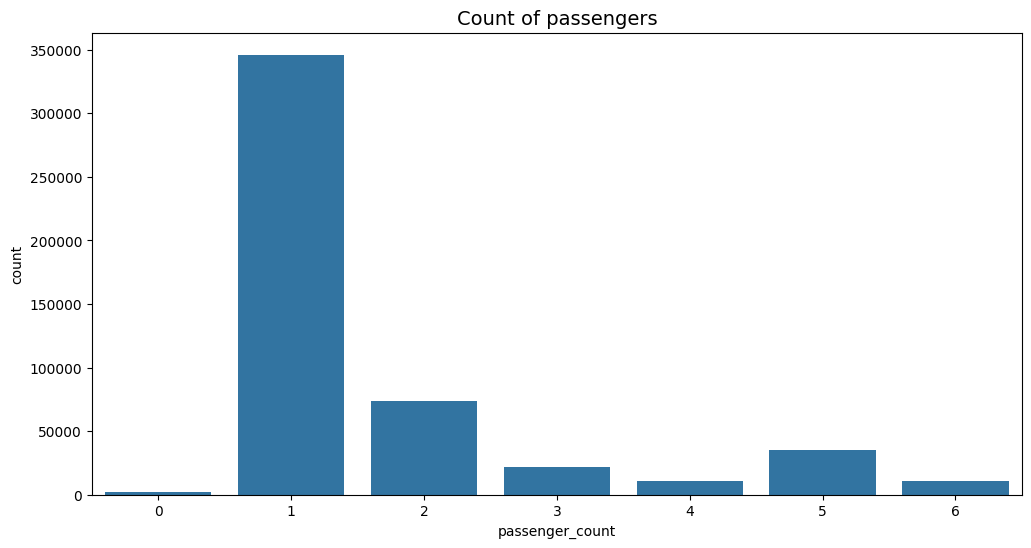

In [ ]:
# Create a figure dimension
plt.figure(figsize=(12, 6))

# CountPlot for type of meal
sns.countplot(data=df, x='passenger_count')
# Add title
plt.title('Count of passengers', fontsize=14)

# Show plot
plt.show()

***Extract the year,month,day,hours from Key column***
- Noted,key and pickup time is same

In [ ]:
df['key'] = pd.to_datetime(df['key'])
# Extracting components
df['Year'] = df['key'].dt.year
df['Month'] = df['key'].dt.month
df['Day'] = df['key'].dt.day
df['Hour'] = df['key'].dt.hour  #format 24 not 12

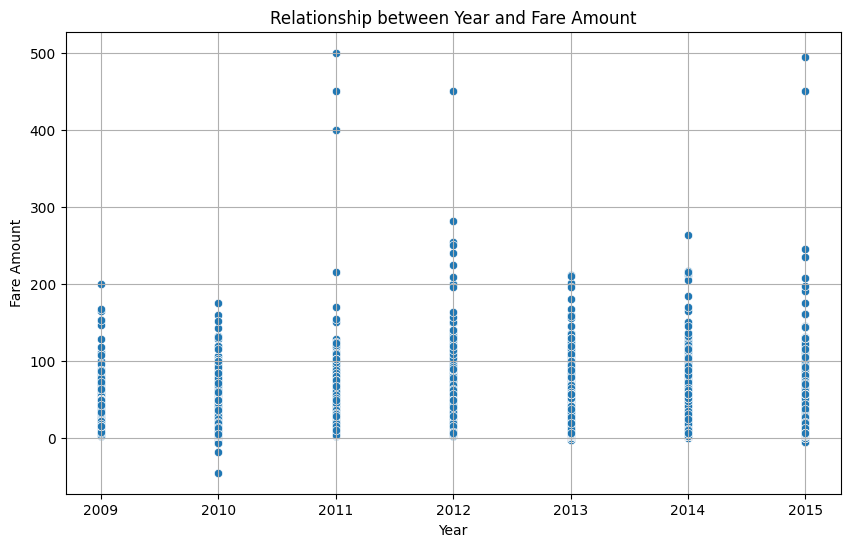

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='fare_amount')
plt.title('Relationship between Year and Fare Amount')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()


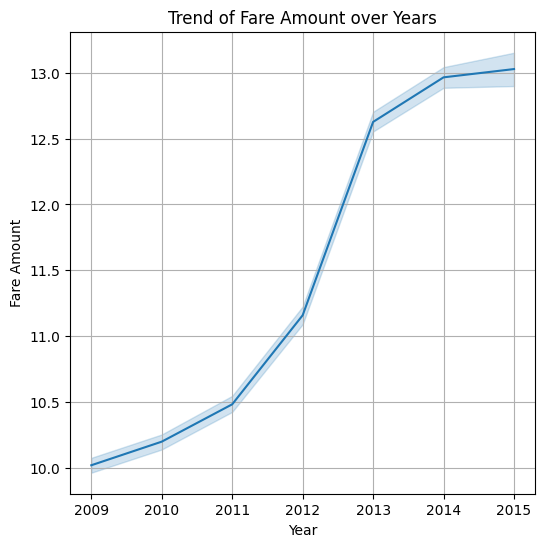

In [ ]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df, x='Year', y='fare_amount')
plt.title('Trend of Fare Amount over Years')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [ ]:
#from the figure above the fare amount inceases interms of the year (Make since)

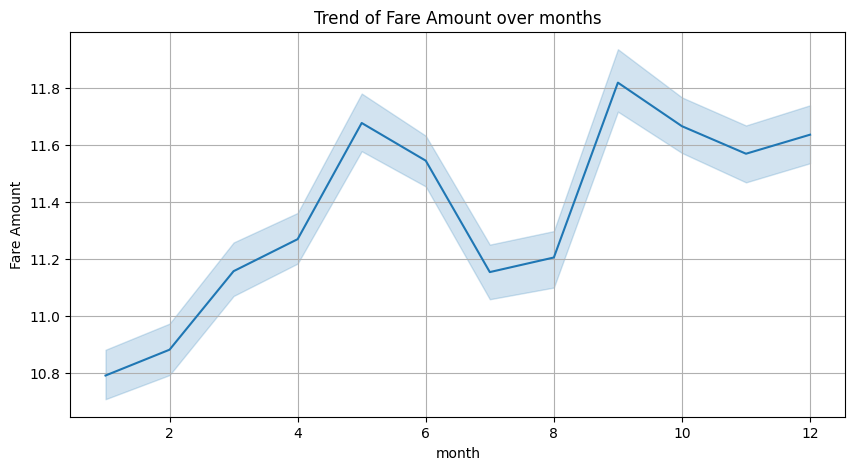

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month', y='fare_amount')
plt.title('Trend of Fare Amount over months')
plt.xlabel('month')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

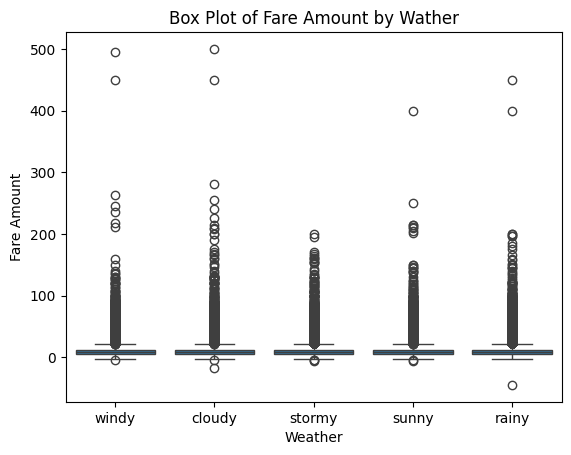

In [ ]:
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.xlabel('Weather')
plt.ylabel('Fare Amount')
plt.title('Box Plot of Fare Amount by Wather')
plt.show()

***Plot the relationship between number of passengers and fare amount***

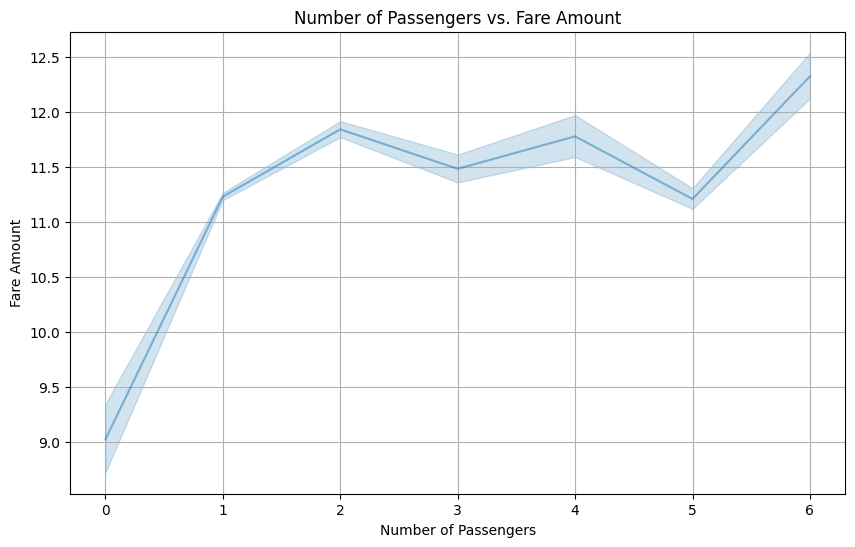

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='fare_amount', data=df, alpha=0.5)
plt.title('Number of Passengers vs. Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

***Plot the relationship between number of weekday and fare amount***

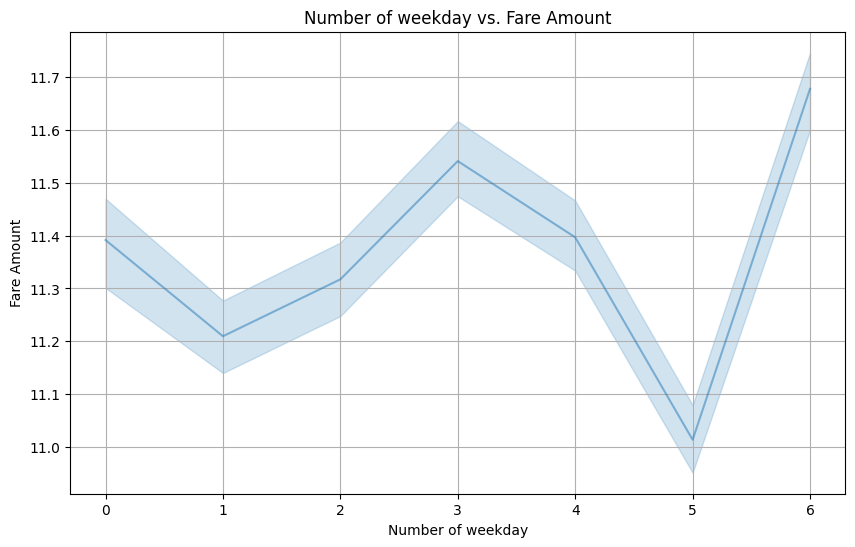

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='fare_amount', data=df, alpha=0.5)
plt.title('Number of weekday vs. Fare Amount')
plt.xlabel('Number of weekday')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

***Plot the correlation matrix***

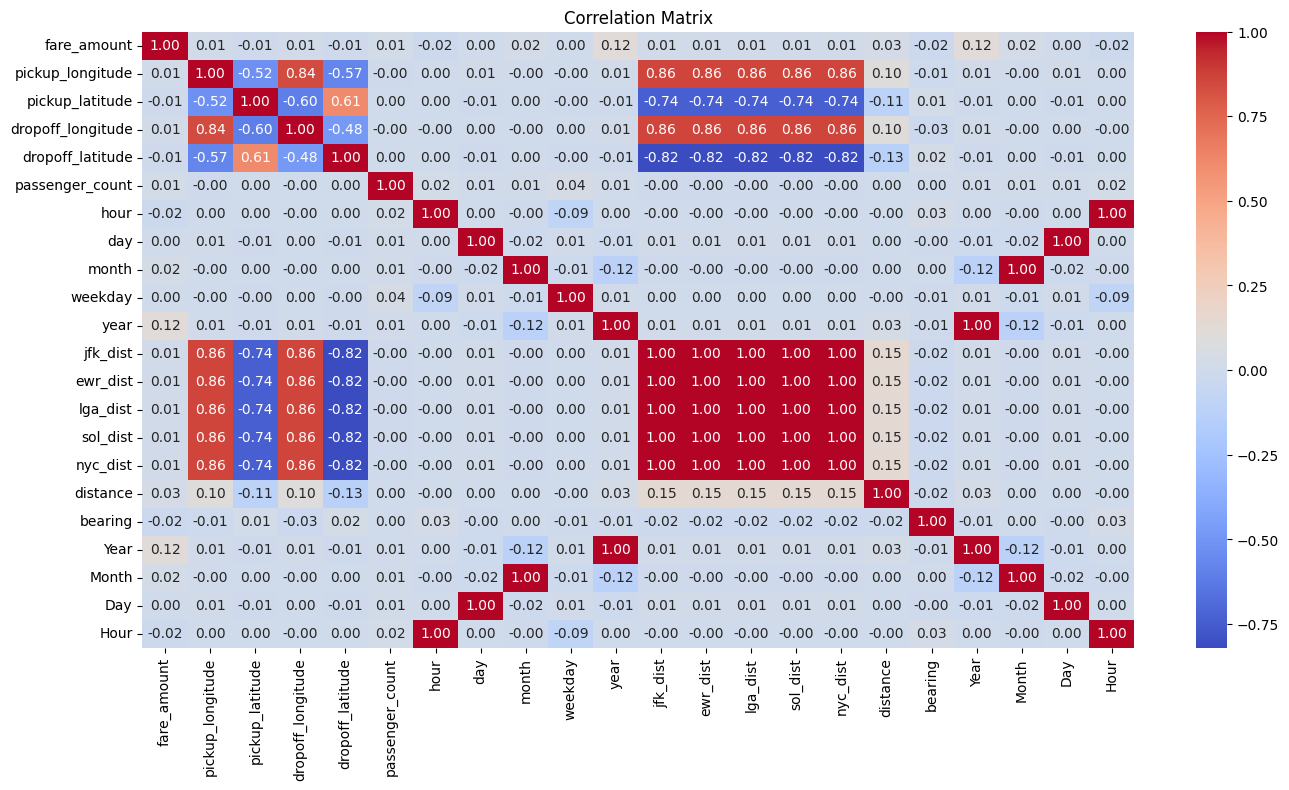

In [ ]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#we can see a lot of correlation between distance and longitude this is because the distance itself uses the longitude and latitude to be calculated.

***Plotting the average fare amount by car condition***

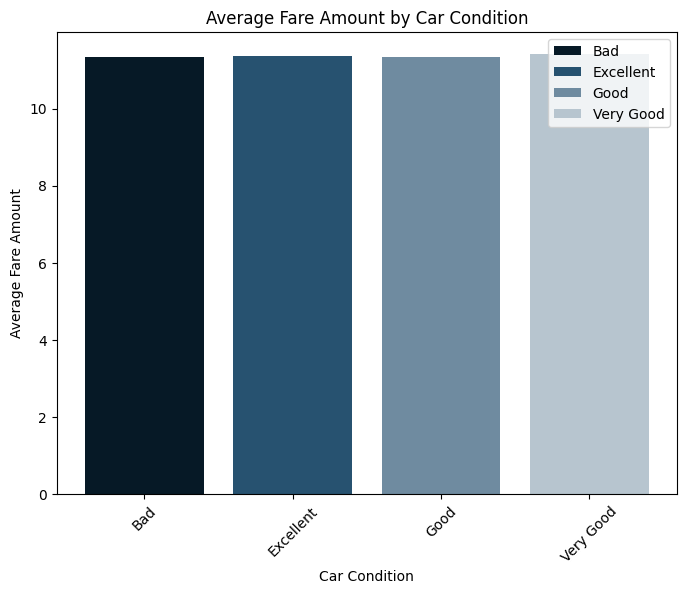

In [ ]:
average_fare_by_condition = df.groupby('Car Condition')['fare_amount'].mean()

colors = ['#061926', '#275270', '#6f8ba0', '#b7c5cf']

# Plotting the average fare amount by car condition
plt.figure(figsize=(8, 6))
bars = plt.bar(average_fare_by_condition.index, average_fare_by_condition.values, color=colors)
plt.xlabel('Car Condition')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Car Condition')
plt.xticks(rotation=45)

# Add legend for colors
plt.legend(bars, average_fare_by_condition.index)

plt.show()


***What are the rush hours in NYC? "The city that never sleeps"***

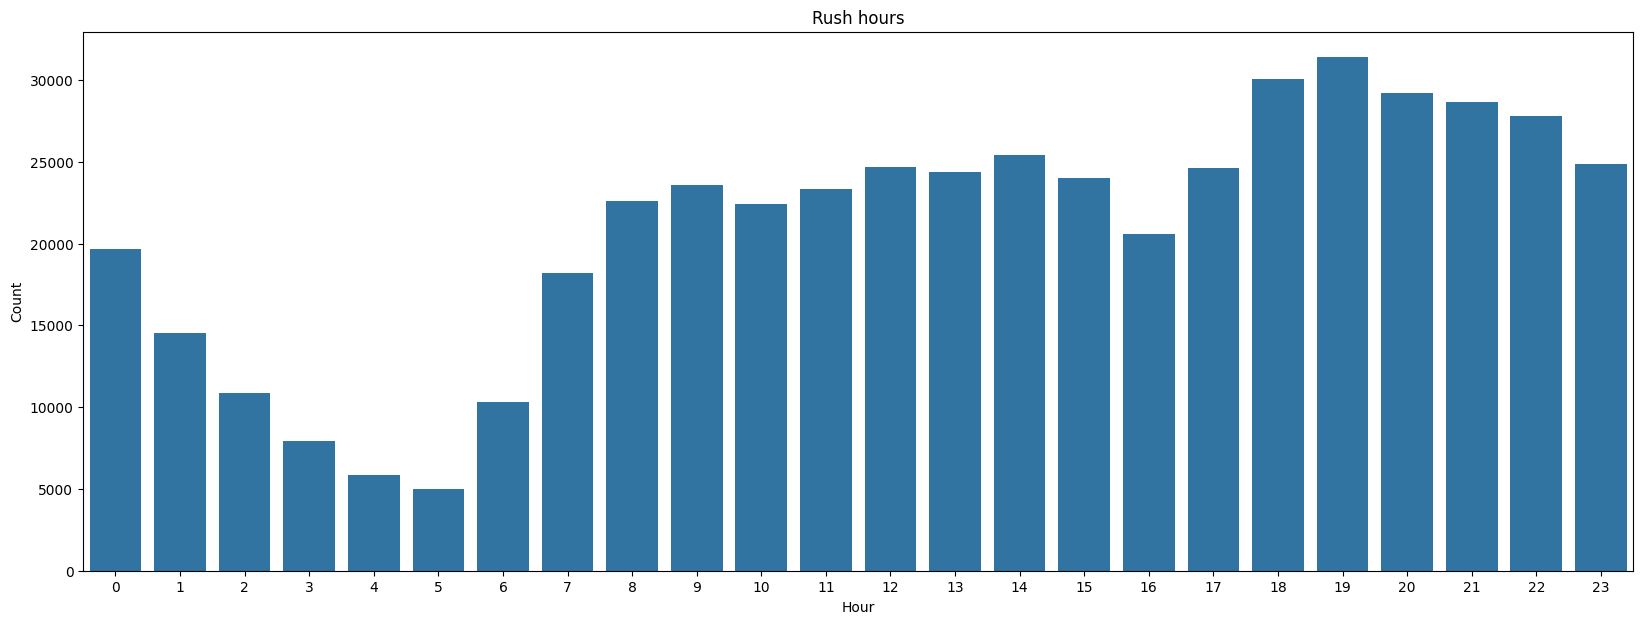

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x="hour")
plt.title("Rush hours")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

#### Rush hour typically starts around 7:00 AM as people commute to work or school, and it peaks around 18:00 (6:00 PM) as people return home. During these peak hours, traffic congestion tends to be at its worst due to the increased volume of vehicles on the road

***Do rush hour and passenger count affect the fare, which could mean to potential split fare fee?***

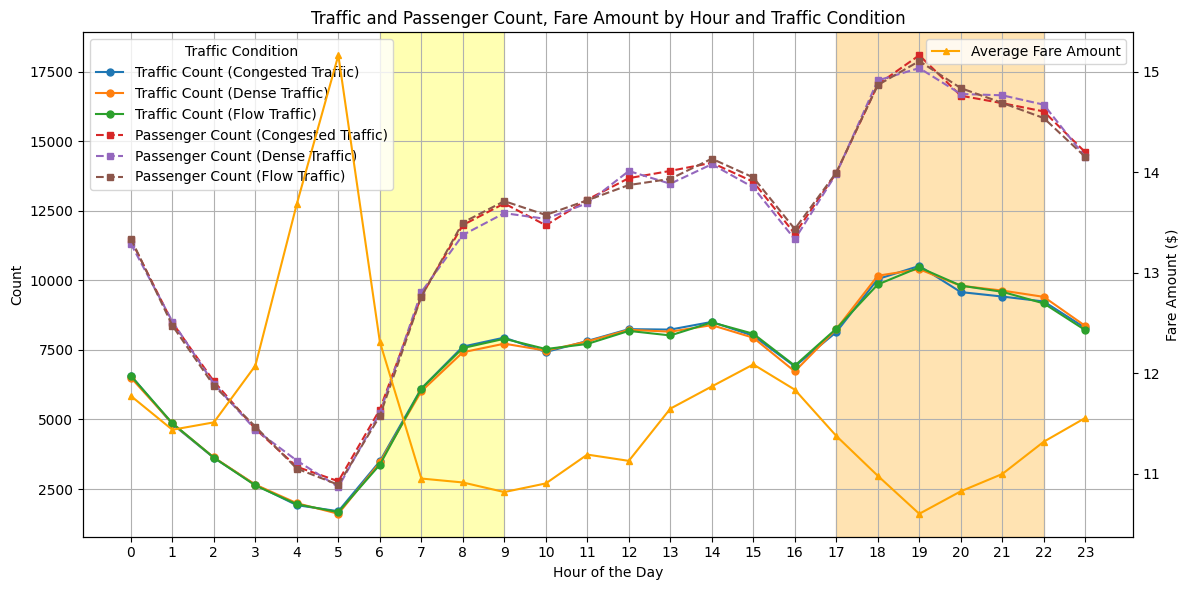

In [ ]:
passenger_count_by_hour_traffic = df.groupby(['hour', 'Traffic Condition'])['passenger_count'].sum().unstack(fill_value=0)
traffic_count_by_hour_traffic = df.groupby(['hour', 'Traffic Condition']).size().unstack(fill_value=0)
fare_amount_by_hour = df.groupby('hour')['fare_amount'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts for each traffic condition
for condition in traffic_count_by_hour_traffic.columns:
    ax1.plot(traffic_count_by_hour_traffic.index, traffic_count_by_hour_traffic[condition], marker='o', markersize=5, label=f'Traffic Count ({condition})')

for condition in passenger_count_by_hour_traffic.columns:
    ax1.plot(passenger_count_by_hour_traffic.index, passenger_count_by_hour_traffic[condition], marker='s', markersize=5, linestyle='--', label=f'Passenger Count ({condition})')

# Plot average fare amount over hours
ax2 = ax1.twinx()
ax2.plot(fare_amount_by_hour.index, fare_amount_by_hour, marker='^', markersize=5, linestyle='-', label='Average Fare Amount', color='orange')

ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Count')
ax2.set_ylabel('Fare Amount ($)')
ax1.set_title('Traffic and Passenger Count, Fare Amount by Hour and Traffic Condition')
ax1.legend(title='Traffic Condition', loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Highlight rush hours
ax1.axvspan(6, 9, color='yellow', alpha=0.3, label='Morning Rush Hour (6AM-9AM)')
ax1.axvspan(17, 22, color='orange', alpha=0.3, label='Evening Rush Hour (5PM-10PM)')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


##### New York's taxis face a double threat: more traffic from buses and cars AND New Yorkers preferring the faster and cheaper subway.
##### A recent New York Times article even highlights the subway's dominance, this could force taxi fares down due to lower demand even during rush hours.

##### The impact depends on where these new drivers and subway riders are compared to taxi hotspots. Flexible pricing and innovative services like carpooling might help taxis compete with cheaper options and ride-hailing apps like Uber and Lyft.

##### The future is uncertain, but one thing's clear: taxis need to adapt or risk fading away in the face of changing transportation preferences and traffic congestion.

***How do bearing angles vary throughout rush hours? & what does that mean?***

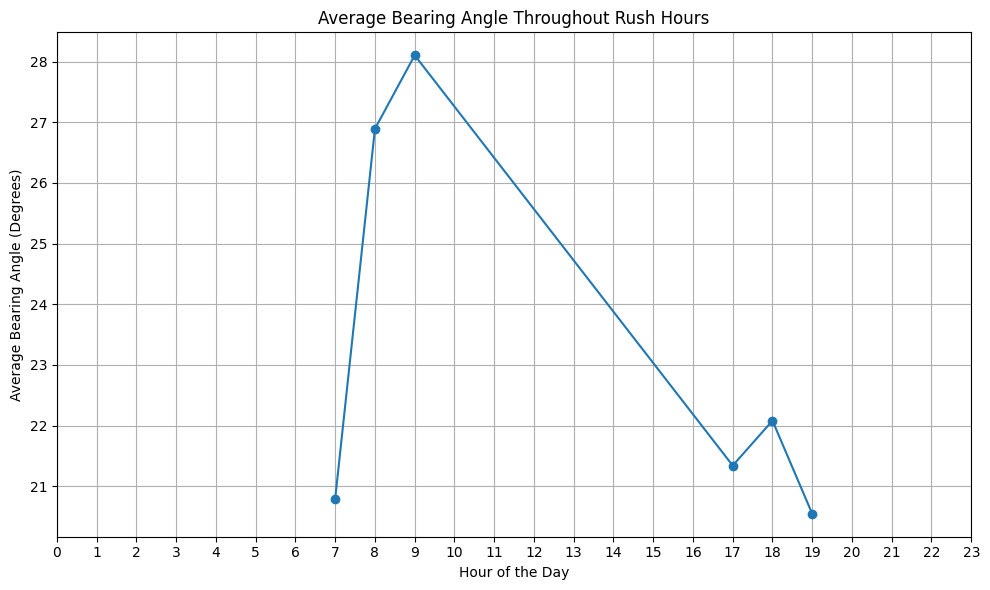

In [ ]:
rush_hour_data2 = df[(df['hour'].isin(range(7, 10)) | df['hour'].isin(range(17, 20)))]
rush_hour_data2['bearing_degrees'] = np.degrees(rush_hour_data2['bearing'])
average_bearing_by_hour = rush_hour_data2.groupby('hour')['bearing_degrees'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_bearing_by_hour.index, average_bearing_by_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bearing Angle (Degrees)')
plt.title('Average Bearing Angle Throughout Rush Hours')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


In [ ]:
#A bearing angle of 0 degrees corresponds to true north.
#A bearing angle of 90 degrees corresponds to east.
#A bearing angle of 180 degrees corresponds to south.
#A bearing angle of 270 degrees corresponds to west.
#A bearing angle of 360 degrees is equivalent to 0 degrees and also corresponds to true north.

***Fare amount with repect to jfk_dist,ewr_dist, lga_dist,nyc_dist***

- Jfk: distance from john Kennedy airport
- Ewr: distance from Newark Liberty International Airport
- Lga: New York Municipal Airport-LaGuardia Field
- Nyc: new York city


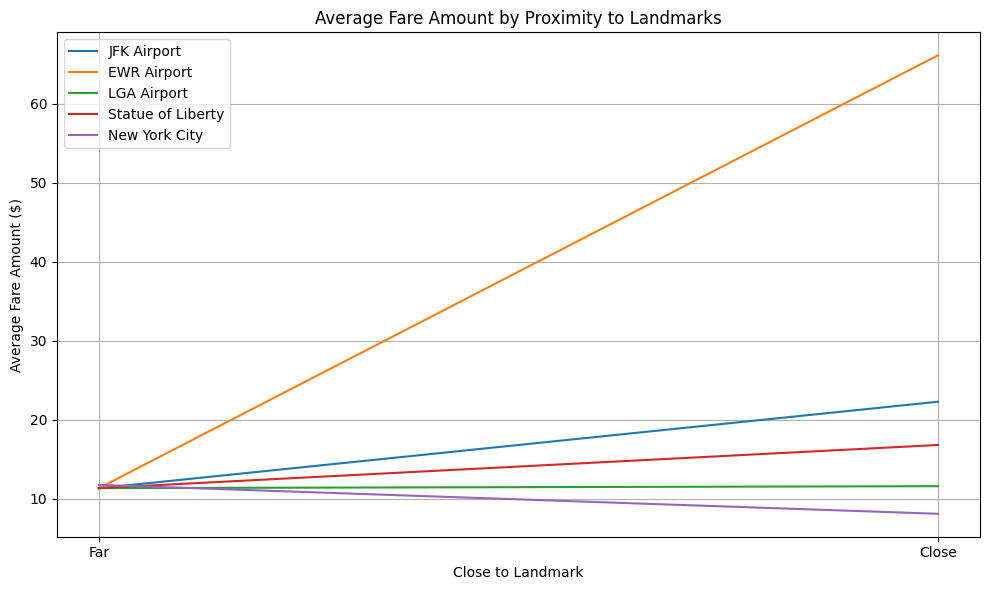

In [ ]:
# 5 miles will be considered close
threshold = 5

# Set values True or False depending on whether the numbers are close or not.
df['close_to_jfk'] = df['jfk_dist'] < threshold
df['close_to_ewr'] = df['ewr_dist'] < threshold
df['close_to_lga'] = df['lga_dist'] < threshold
df['close_to_sol'] = df['sol_dist'] < threshold
df['close_to_nyc'] = df['nyc_dist'] < threshold

# Average fare rate for each landmark based on whether close or not.
average_fare_jfk = df.groupby('close_to_jfk')['fare_amount'].mean()
average_fare_ewr = df.groupby('close_to_ewr')['fare_amount'].mean()
average_fare_lga = df.groupby('close_to_lga')['fare_amount'].mean()
average_fare_sol = df.groupby('close_to_sol')['fare_amount'].mean()
average_fare_nyc = df.groupby('close_to_nyc')['fare_amount'].mean()

plt.figure(figsize=(10, 6))

plt.plot(average_fare_jfk.index, average_fare_jfk.values, label='JFK Airport')
plt.plot(average_fare_ewr.index, average_fare_ewr.values, label='EWR Airport')
plt.plot(average_fare_lga.index, average_fare_lga.values, label='LGA Airport')
plt.plot(average_fare_sol.index, average_fare_sol.values, label='Statue of Liberty')
plt.plot(average_fare_nyc.index, average_fare_nyc.values, label='New York City')

plt.xlabel('Close to Landmark')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount by Proximity to Landmarks')
plt.legend()
plt.grid(True)

# "far" (False) or "close" (True)
plt.xticks([0, 1], ['Far', 'Close'])
plt.tight_layout()
plt.show()


***Preprocessing***
-  Drop unnecessarily columns such as Username,driverName,UserID
-  remove the outliers
-  drop the values of fare_amount that is less than  or equal zero as we shown abovest',

In [ ]:
print(len(df[df['fare_amount'] < 0])) # number of records that contain negative values
print(len(df[df['fare_amount'] ==0])) # number of records that contain negative values)

21
14


In [ ]:
df = df[~(df['fare_amount'] <= 0)]
# Print the length of the filtered DataFrame
print(len(df))

499965


In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
len(df)

499960

In [ ]:
# Assuming df is your DataFrame
car_df=df.copy()
columns_dropped=["year","month","day","hour","jfk_dist","key","ewr_dist","lga_dist","nyc_dist","sol_dist","User ID","User Name","Driver Name",
                 "pickup_longitude","pickup_latitude","dropoff_latitude","dropoff_longitude","pickup_datetime","bearing"]
car_df=car_df.drop(columns=columns_dropped)
car_df = car_df[car_df['fare_amount'] <= 200]

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499934 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Car Condition      499934 non-null  object 
 1   Weather            499934 non-null  object 
 2   Traffic Condition  499934 non-null  object 
 3   fare_amount        499934 non-null  float64
 4   passenger_count    499934 non-null  int64  
 5   weekday            499934 non-null  int64  
 6   distance           499934 non-null  float64
 7   Year               499934 non-null  int32  
 8   Month              499934 non-null  int32  
 9   Day                499934 non-null  int32  
 10  Hour               499934 non-null  int32  
 11  close_to_jfk       499934 non-null  bool   
 12  close_to_ewr       499934 non-null  bool   
 13  close_to_lga       499934 non-null  bool   
 14  close_to_sol       499934 non-null  bool   
 15  close_to_nyc       499934 non-null  bool   
dtypes: bool

***Select the features and the labels separetly***

In [ ]:
label_encoder = LabelEncoder()

# Iterate over each categorical feature and encode its values
for feature in caltegorical_features:
    # Fit label encoder and transform feature
    car_df[feature] = label_encoder.fit_transform(car_df[feature])


In [ ]:
features = car_df.drop(columns=['fare_amount'])
labels = car_df['fare_amount']

***Split the data to train, test and validation***

In [ ]:
X, X_test, y, y_test = train_test_split(features, labels, test_size=0.33, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.33, random_state=2)

***Normalise the data***

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.transform(X_val)

In [ ]:
accuracy_score_train = {
  'Model': [],
  'MSE': [],
  'RMSE': []
}
accuracy_score_val = {
  'Model': [],
  'MSE': [],
  'RMSE': []
}

def evaluate_model(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  y_predict_train = model.predict(X_train)
  y_predict_val = model.predict(X_val)

  accuracy_score_train['Model'].append(model.__class__.__name__)
  accuracy_score_train['MSE'].append(mean_squared_error(y_train, y_predict_train))
  accuracy_score_train['RMSE'].append(np.sqrt(mean_squared_error(y_train, y_predict_train)))

  accuracy_score_val['Model'].append(model.__class__.__name__)
  accuracy_score_val['MSE'].append(mean_squared_error(y_val, y_predict_val))
  accuracy_score_val['RMSE'].append(np.sqrt(mean_squared_error(y_train, y_predict_train)))


***Model Training***

In [ ]:
Ridge_model = Ridge(alpha=1)
LinearRegression_model = LinearRegression()
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

evaluate_model(Ridge_model, X_train, y_train, X_val, y_val)
evaluate_model(LinearRegression_model, X_train, y_train, X_val, y_val)
evaluate_model(poly_model, X_train, y_train, X_val, y_val)

***Evaluate the Model***

In [ ]:
accuracy_train_tbl = pd.DataFrame(accuracy_score_train)
accuracy_val_tbl = pd.DataFrame(accuracy_score_val)
accuracy_tbl = pd.merge(accuracy_train_tbl, accuracy_val_tbl, on='Model')
accuracy_tbl = accuracy_tbl.rename(columns={'Accuracy_x': 'accuracy_score_train', 'Accuracy_y': 'accuracy_score_val'})
accuracy_tbl

,Model,MSE_x,RMSE_x,MSE_y,RMSE_y
0,Ridge,91.060307,9.542552,8.954393e+01,9.542552
1,LinearRegression,91.060307,9.542552,8.954393e+01,9.542552
2,Pipeline,76.053423,8.720861,1.830703e+12,8.720861


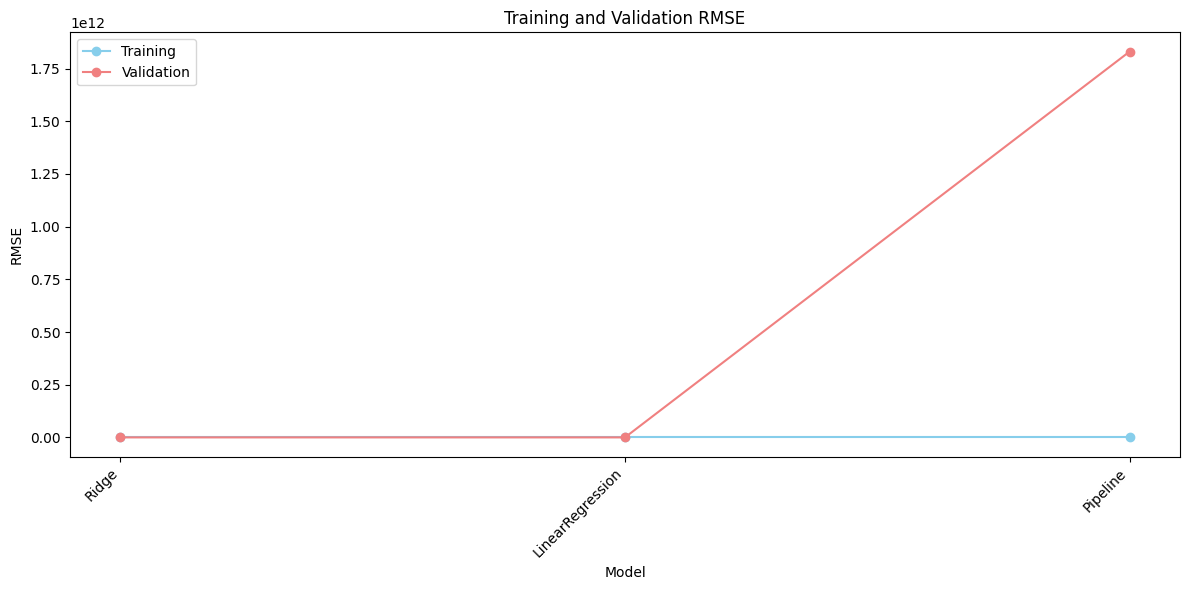

In [ ]:
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy lines
plt.plot(accuracy_tbl['Model'], accuracy_tbl['MSE_x'], marker='o', label='Training', color='skyblue')
plt.plot(accuracy_tbl['Model'], accuracy_tbl['MSE_y'], marker='o', label='Validation', color='lightcoral')

plt.xticks(rotation=45, ha='right')
plt.title('Training and Validation RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()

plt.show()